# Import all the Dependencies

In [1]:
import nltk
import re
import string
import glob
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

## Loading the Datasets in our Python Envirnment

In [2]:
all_files = glob.glob(r"C:\Users\Devjp\Data 2.0\Assignment_1\*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
df.shape

(36831, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36831 entries, 0 to 3643
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  36831 non-null  object
 1   Tweet Id  36831 non-null  int64 
 2   Text      36831 non-null  object
 3   URL       36831 non-null  object
 4   User      36831 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


__Changing the Datatypes of date and text__

In [5]:
df['Date'] = pd.to_datetime(df['Datetime']).dt.date
df['Text'] = df['Text'].astype('string')

In [6]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'Date'], dtype='object')

In [7]:
df.drop('URL',axis=1, inplace=True)

In [8]:
df.head()

,Datetime,Tweet Id,Text,User,Date
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: #ETH $1430.93 USD #B...,https://twitter.com/0xEthereumYoda,2023-03-10
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213,2023-03-10
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n,2023-03-10
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_,2023-03-10
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP,2023-03-10


### Checking Null Values

In [9]:
df.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
User        0
Date        0
dtype: int64

### Dropping Duplicate Values

In [10]:
df = df.drop_duplicates(subset=["Text"])

### Finding Common Values

In [11]:
print(Counter(df['Text']).most_common(10))

[('#Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto', 1), ('@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀', 1), ('@Altcoin_Gold Missing $DSLA', 1), ('@Altcoin_Gems_ @Lotto_Arb Wow interesting', 1), ('@TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo', 1), ('@TreatsBot $paw #paw #altcoin #airdroo https://t.co/0qX5bAbzi0', 1), ('@Altcoin_Gems_ @Lotto_Arb this project gonna be successful', 1), ('@Altcoin_Gems_ @Lotto_Arb great project', 1), ('@TreatsBot $paw #paw #altcoin #memecoins https://t.co/KzN1S9DRwB', 1), ('🚨 Price pattern in $RUNE\n\nSymmetrical triangle on RUNEUSDT 30m chart.\n\nMore info at https://t.co/ywZtYlJOeb\n\n#THORChain #crypto #altcoin https://t.co/VcMuh76Tpg', 1)]


# Text Cleaning

In [12]:
from wordcloud import STOPWORDS

s_words= list(stopwords.words('english'))

from collections import Counter
c = Counter()

extra_s= ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are",
          "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's",
          "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
          'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','realli','now','got','man','people','a',
          'becaus','caus',"one","im","guy","someone","two",'read', "nearby","i","he's","she's","we","it","they","wouldn’t","i've", 'publications', 'publication',
          'aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven', 'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",'writer','review','pages','issue','document']
stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

def remove_stopwords(df,column,freq):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.lower() not in freq ]))

In [13]:
def to_lower(df, column):
    df[column] = df[column].apply(lambda x: str(x).lower())

In [14]:
def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis = 1, inplace = True)

In [15]:
def punctuator(df,column):
    df[column] = df[column].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))

In [16]:
def remove_digits(df,column):
      df[column] = df[column].apply(lambda x: ' '.join(''.join(char if char.isalpha() or char.isspace() else ' ' for char in word) for word in str(x).split()))

In [17]:
def remove_emojis(df, column):
    df[column] = df[column].apply(lambda x: ' '.join([emoji.replace_emoji(word, replace='') for word in x.split()]))

In [18]:
def lemmatize(df,column):
      df[column] = df[column].apply(lambda x: ' '.join([nltk.WordNetLemmatizer().lemmatize(word) for word in x]))

In [19]:
def word_cloud(text):
    stopword_list = set(stop_words)
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 12).generate_from_text(text)
    plt.figure(figsize = (8, 6))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [20]:
#calling all the Function



In [21]:
df['Cleaned_Text'] = df['Text']

In [22]:
remove_stopwords(df=df, column ='Cleaned_Text', freq=[])

In [23]:
punctuator(df, column = 'Cleaned_Text')

In [24]:
remove_digits(df, column = 'Cleaned_Text')

In [25]:
to_lower(df=df, column='Cleaned_Text')

In [26]:
remove_emojis(df=df, column ='Cleaned_Text')

In [27]:
text = df['Cleaned_Text']
text = text.dropna()
tokenized_text = text.apply(lambda x: word_tokenize(str(x)))

In [28]:
tokenized_text

0       [ethereum, price, update, eth, usd, bitcoin, b...
1                  [altcoingems, lottoarb, wow, fstastic]
2                            [altcoingold, missing, dsla]
3               [altcoingems, lottoarb, wow, interesting]
4       [treatsbot, paw, paw, altcoin, memecoins, http...
                              ...                        
3639    [khosi, yhoo, haa, nana, dangerous, bbtitans, ...
3640    [yhoo, nana, business, thabang, yhoo, haa, bbt...
3641                                          [yes, yhoo]
3642                            [yhoo, go, bed, bbtitans]
3643    [nguboayimbathwa, christothurston, thulimadons...
Name: Cleaned_Text, Length: 35661, dtype: object

In [29]:
len(tokenized_text)

35661

In [30]:
df['tokenized_text']= tokenized_text

In [31]:
lemmatize(df=df, column = 'tokenized_text')

# WORD CLOUD

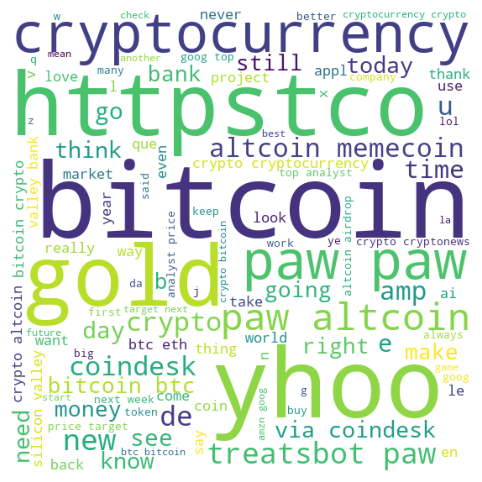

In [32]:
tokenized_wordcloud = ' '.join(df.tokenized_text.astype(str).tolist())
word_cloud(tokenized_wordcloud)

In [33]:
print(Counter(df['Cleaned_Text']).most_common(10))

[('yhoo', 70), ('bitcoinprice cryptocurrency bitcoin', 57), ('bitcoin worth market cap billion based coindesk bpi bitcoin', 55), ('btcusd shorted binance utc btc cryptocurrency', 44), ('btcusd longed binance utc btc cryptocurrency', 33), ('', 31), ('cn shill best altcoin memecoin richquack quack', 26), ('dm altcoin x today tell richquack quack', 26), ('ck low cap altcoin aware of richquack quack', 26), ('cj altcoin x week richquack quack', 26)]


### Before and After Text Wrangling

In [34]:
df['Text'].head()

0    #Ethereum price update: 

#ETH $1430.93 USD
#B...
1    @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...
2                          @Altcoin_Gold Missing $DSLA
3            @Altcoin_Gems_ @Lotto_Arb Wow interesting
4    @TreatsBot $paw #paw #altcoin #memecoins https...
Name: Text, dtype: string

In [35]:
df['Cleaned_Text'].head()

0    ethereum price update eth usd bitcoin btc foll...
1                    altcoingems lottoarb wow fstastic
2                             altcoingold missing dsla
3                 altcoingems lottoarb wow interesting
4    treatsbot paw paw altcoin memecoins httpstcohi...
Name: Cleaned_Text, dtype: object

In [36]:
df['tokenized_text'].head()

0    ethereum price update eth usd bitcoin btc foll...
1                    altcoingems lottoarb wow fstastic
2                             altcoingold missing dsla
3                 altcoingems lottoarb wow interesting
4    treatsbot paw paw altcoin memecoins httpstcohi...
Name: tokenized_text, dtype: object

In [37]:
df.head()

,Datetime,Tweet Id,Text,User,Date,Cleaned_Text,tokenized_text
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: #ETH $1430.93 USD #B...,https://twitter.com/0xEthereumYoda,2023-03-10,ethereum price update eth usd bitcoin btc foll...,ethereum price update eth usd bitcoin btc foll...
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213,2023-03-10,altcoingems lottoarb wow fstastic,altcoingems lottoarb wow fstastic
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n,2023-03-10,altcoingold missing dsla,altcoingold missing dsla
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_,2023-03-10,altcoingems lottoarb wow interesting,altcoingems lottoarb wow interesting
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP,2023-03-10,treatsbot paw paw altcoin memecoins httpstcohi...,treatsbot paw paw altcoin memecoins httpstcohi...


### Added Daily Tweets and User Counts

In [38]:
daily_tweet_counts = df['Date'].value_counts().sort_index()
daily_user_counts = df.groupby('Date')['User'].nunique().sort_index()

### Daily Tweet Analysis

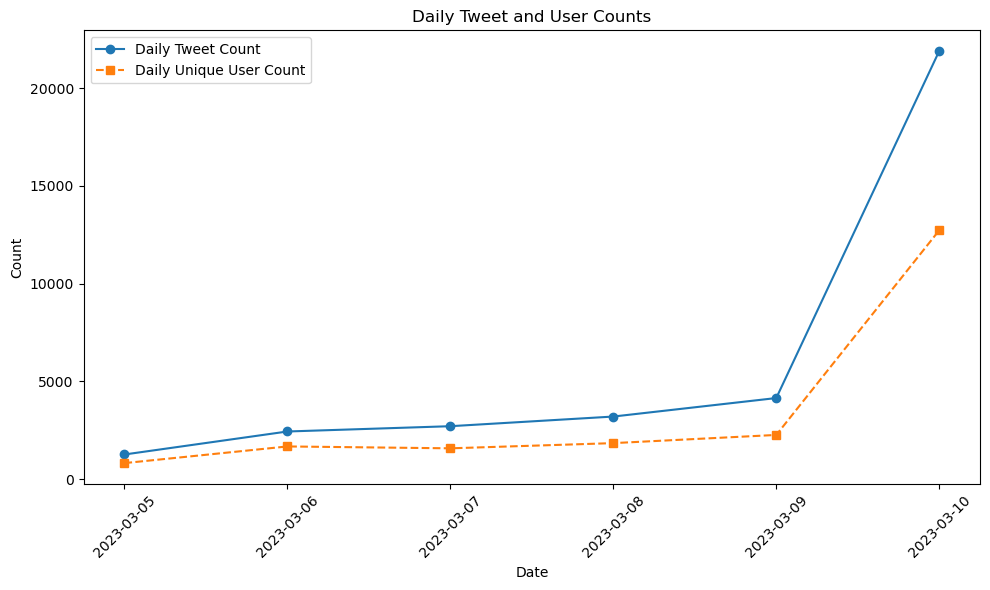

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(daily_tweet_counts.index, daily_tweet_counts.values, marker='o', linestyle='-', label='Daily Tweet Count')
plt.plot(daily_user_counts.index, daily_user_counts.values, marker='s', linestyle='--', label='Daily Unique User Count')
plt.title('Daily Tweet and User Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Histogram of Tweet Lengths

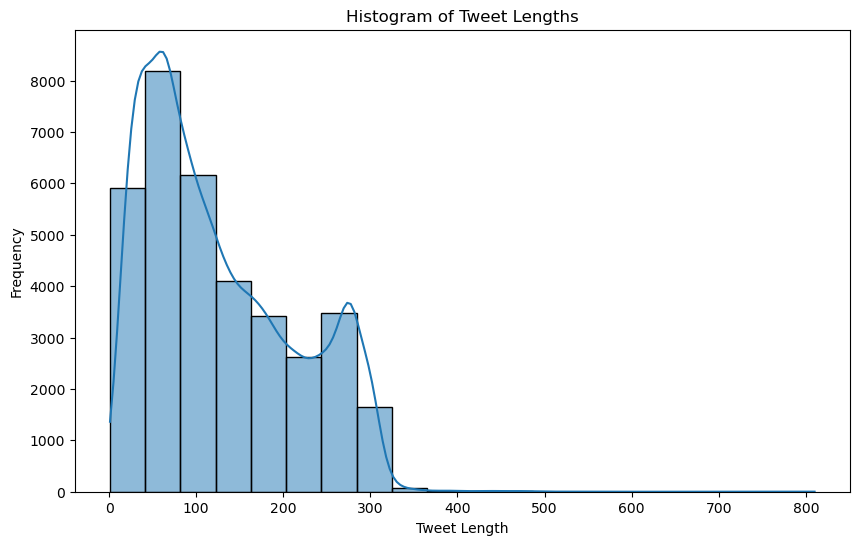

In [40]:
tweet_lengths = df['Text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(tweet_lengths, bins=20, kde=True)
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

### Tweets Based Upon Hours

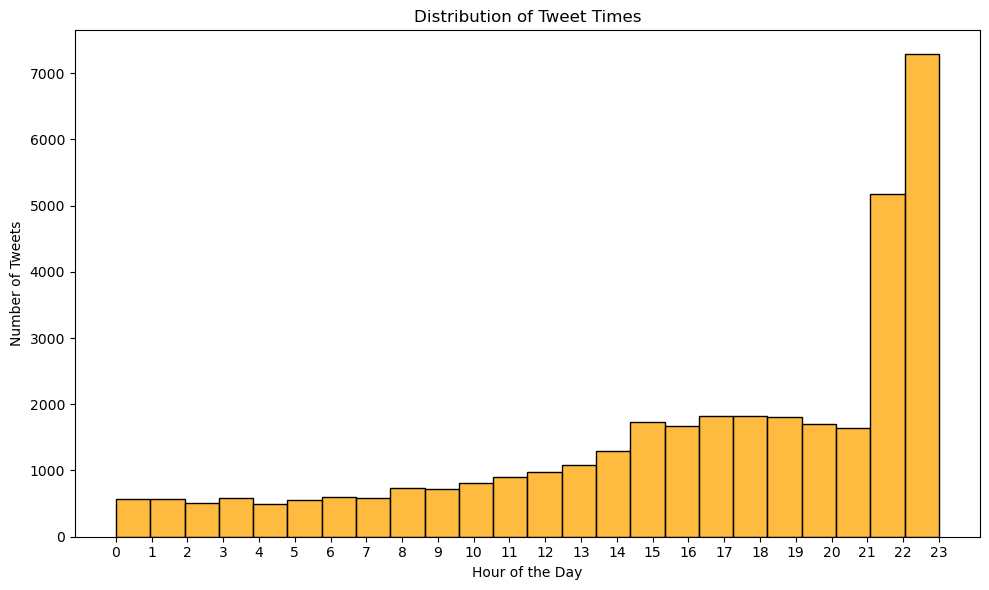

In [41]:
tweet_times = pd.to_datetime(df['Datetime']).dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(tweet_times, bins=24, kde=False, color='orange', edgecolor='black')
plt.title('Distribution of Tweet Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Top Users

In [42]:
tweet_table = pd.DataFrame({
    'Date': daily_tweet_counts.index,
    'Daily Tweet Count': daily_tweet_counts.values,
    'Daily Unique User Count': daily_user_counts.values
})
print(tweet_table)

         Date  Daily Tweet Count  Daily Unique User Count
0  2023-03-05               1259                      818
1  2023-03-06               2436                     1671
2  2023-03-07               2707                     1575
3  2023-03-08               3201                     1841
4  2023-03-09               4148                     2260
5  2023-03-10              21910                    12733


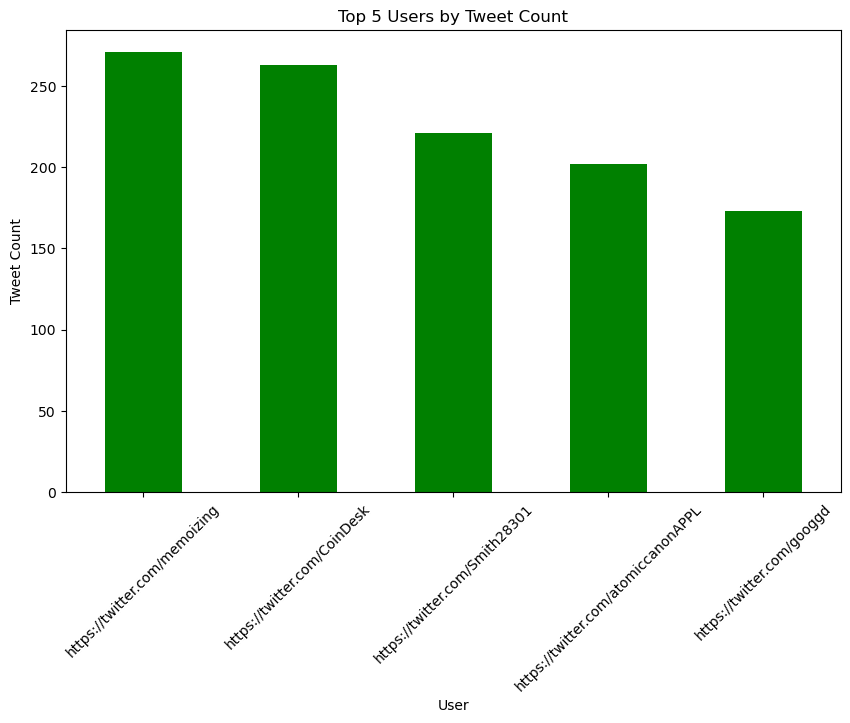

<Figure size 640x480 with 0 Axes>

In [43]:
top_users = df['User'].value_counts().head(5)
plt.figure(figsize=(10, 6))
ax = top_users.plot(kind='bar', color='green')
plt.title('Top 5 Users by Tweet Count')
plt.xlabel('User')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()

for i, count in enumerate(top_users):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Top 20 Frequent Words

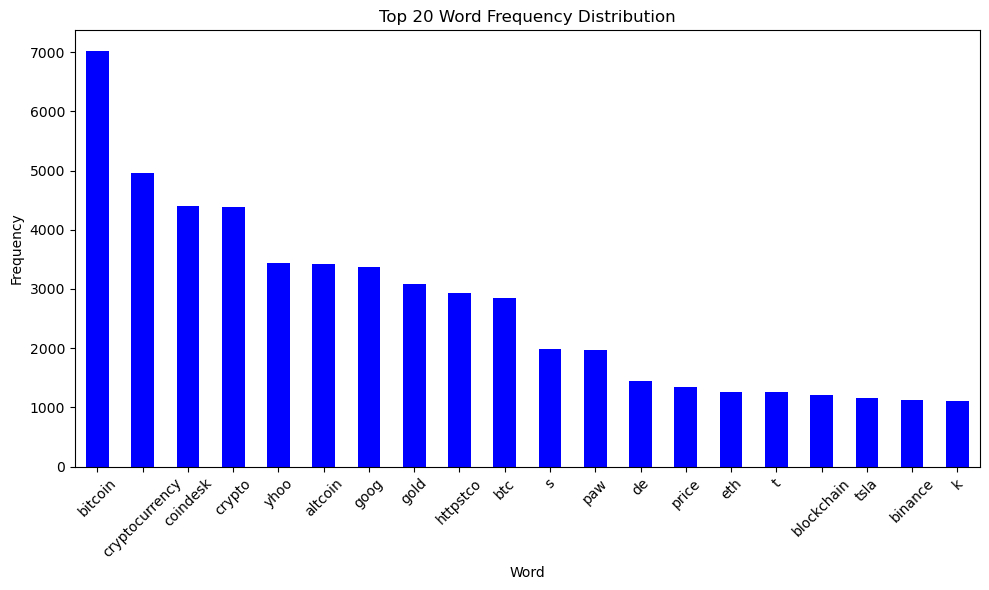

In [44]:
word_frequency = pd.Series(' '.join(df['Cleaned_Text']).split()).value_counts().head(20)
plt.figure(figsize=(10, 6))
word_frequency.plot(kind='bar', color='blue')
plt.title('Top 20 Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

('🔙', '🚮', '👍🏽', '🤧', '🏹', '😜', '🍰', '🗒️', '💘', '⛽', '🌪️', '🗞️', '🤕', '💁🏻\u200d♂️', '💞', '🐑', '💏', '🔒', '🌍', '🎣')


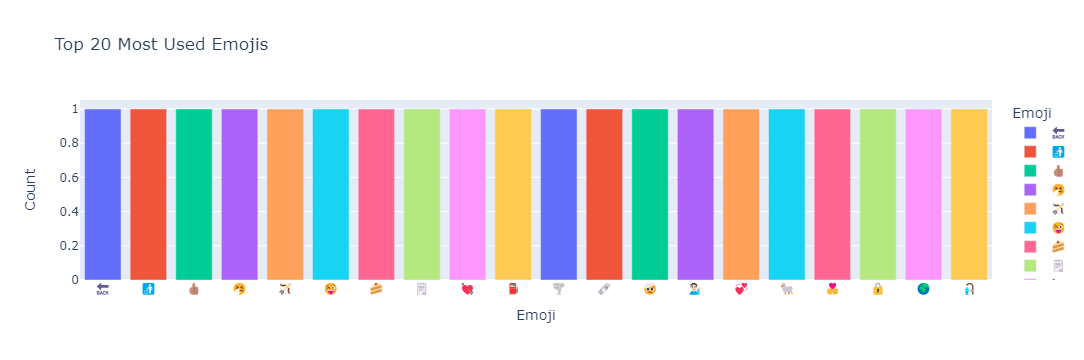

In [47]:
text_data = df['Text'].str.cat(sep=' ')
emojis = emoji.distinct_emoji_list(text_data)
emoji_counts = Counter(emojis)

most_common_emojis = emoji_counts.most_common(20)
emojis, counts = zip(*most_common_emojis)
emoji_df = pd.DataFrame({'Emoji': emojis, 'Count': counts})
print(emojis)

fig = px.bar(emoji_df, x='Emoji', y='Count', color='Emoji',
             title='Top 20 Most Used Emojis', labels={'Emoji': 'Emoji', 'Count': 'Count'})
fig.show()


### Tweets Based Upon Days

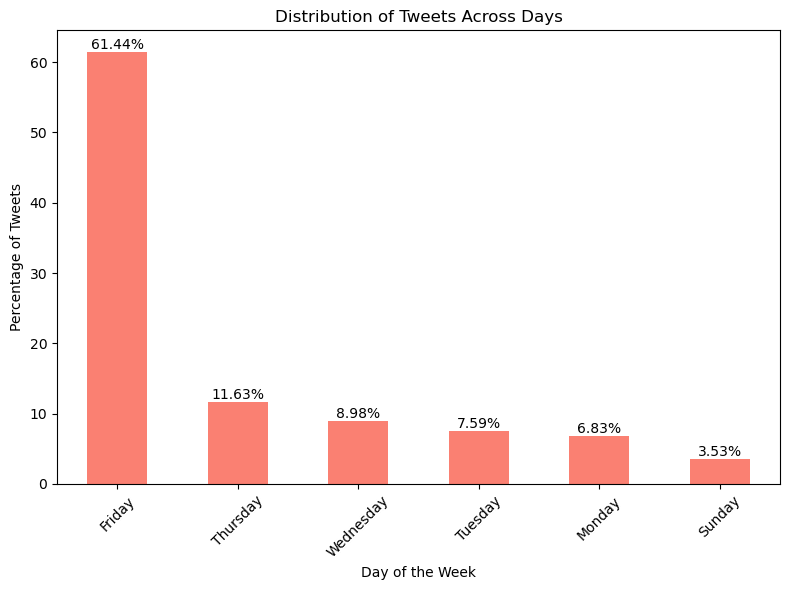

In [46]:
tweet_dates = pd.to_datetime(df['Date'])
tweet_days = tweet_dates.dt.day_name()

tweet_day_counts = tweet_days.value_counts()
total_tweets = tweet_day_counts.sum()
tweet_day_percentages = (tweet_day_counts / total_tweets) * 100

plt.figure(figsize=(8, 6))
ax = tweet_day_percentages.plot(kind='bar', color='salmon')
plt.title('Distribution of Tweets Across Days')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Tweets')
plt.xticks(rotation=45)

for i, percentage in enumerate(tweet_day_percentages):
    ax.annotate(f'{percentage:.2f}%', xy=(i, percentage), ha='center', va='bottom')

plt.tight_layout()
plt.show()